In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Check for missing values
print(df.isnull().sum())

# Drop rows with NaN values
df = df.dropna()

# Scale the 'Amount' feature and drop the 'Time' feature
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df = df.drop(columns=['Time'])

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Check for NaN values in y
print(y.isnull().sum())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64
0


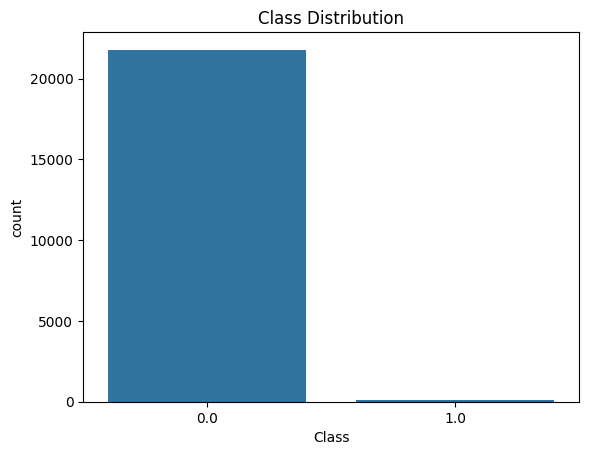

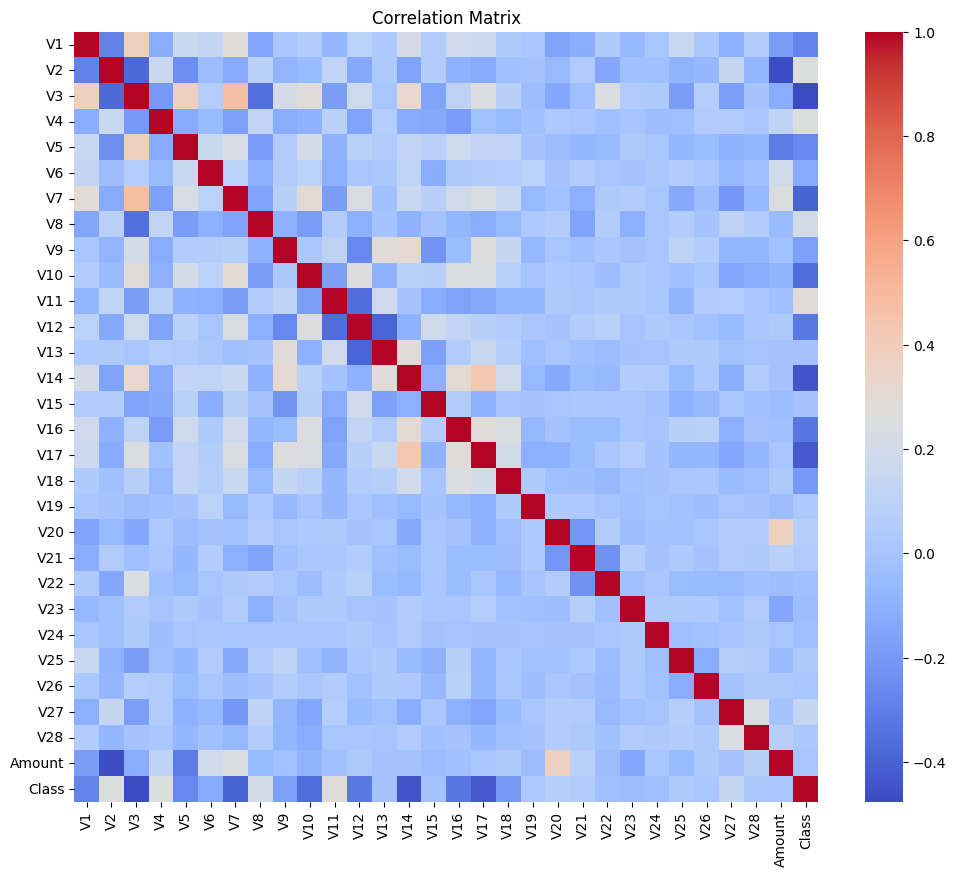

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the class distribution
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4359
         1.0       0.88      0.88      0.88        17

    accuracy                           1.00      4376
   macro avg       0.94      0.94      0.94      4376
weighted avg       1.00      1.00      1.00      4376

Confusion Matrix:
[[4357    2]
 [   2   15]]
ROC AUC Score: 0.9999122842529992


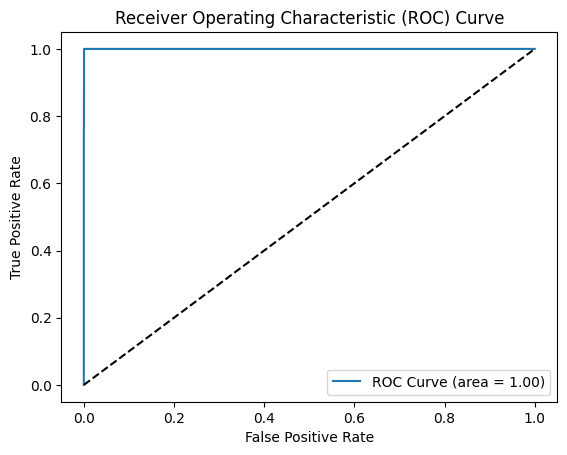

In [6]:
# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()
